In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from models_fit_rmse import algoModel

In [2]:
diamonds = pd.read_csv('input/diamonds-datamad0120/diamonds_train.csv')

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40345 entries, 0 to 40344
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40345 non-null  int64  
 1   carat    40345 non-null  float64
 2   cut      40345 non-null  object 
 3   color    40345 non-null  object 
 4   clarity  40345 non-null  object 
 5   depth    40345 non-null  float64
 6   table    40345 non-null  float64
 7   x        40345 non-null  float64
 8   y        40345 non-null  float64
 9   z        40345 non-null  float64
 10  price    40345 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


# Cleaning

In [4]:
diamonds.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

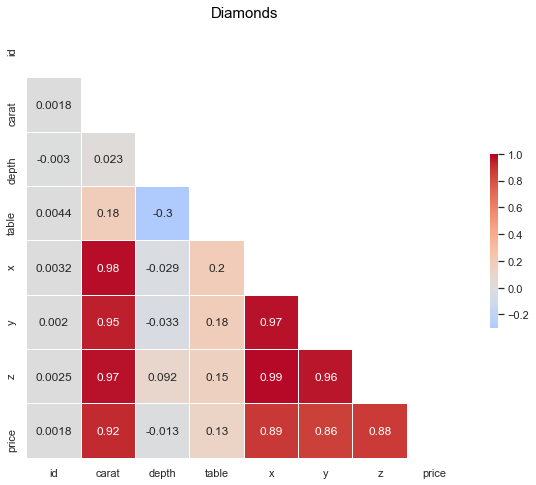

In [5]:
#Correlation Matrix
corr = diamonds.corr()
sns.set(style="white")
# Compute the correlation matrix
corr = diamonds.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = plt.cm.get_cmap("coolwarm")
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .4}, annot=True)
plt.title("Diamonds", fontsize=15, color="black", weight="medium")
sns.set()

In [6]:
#Analyzing categorical data
diamonds['cut'].unique() # This serie could be set to different weights

array(['Premium', 'Ideal', 'Very Good', 'Fair', 'Good'], dtype=object)

In [7]:
#Assign different weights to diamonds['cut']

values = {'Premium': 5, 'Ideal': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}

for index, row in diamonds.iterrows():
    if row['cut'] in values.keys():
        diamonds.loc[index, 'cutW'] = values[row['cut']]


In [8]:
diamonds_new = diamonds.drop(columns=['cut', 'x', 'y', 'z'])

In [9]:
diamonds_new = pd.get_dummies(diamonds_new)
diamonds_new.head()

,id,carat,depth,table,price,cutW,color_D,color_E,color_F,color_G,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,0.78,61.5,58.0,3446,5.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.31,60.8,56.0,732,4.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2,0.30,62.3,54.0,475,4.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1.04,62.0,58.0,9552,4.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.65,61.4,55.0,1276,4.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [10]:
diamonds_new1 = diamonds_new.drop(columns=['id'])

In [11]:
col = ['carat', 'depth', 'table', 'cutW', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2']

In [12]:
X = diamonds_new[col]
y = diamonds_new['price']

# Training

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
algorithms = { "rf_re1": RandomForestRegressor(n_estimators=100, max_depth=21, min_samples_leaf=2).fit(X, y),
              "rf_re2": RandomForestRegressor(n_estimators=85, max_depth=21, min_samples_leaf=3).fit(X, y),
              "gb1": GradientBoostingRegressor(n_estimators= 2500, max_depth= 4, min_samples_split= 2).fit(X, y),
              "gb2": GradientBoostingRegressor(n_estimators= 2000, max_depth= 4, min_samples_split= 2).fit(X, y),
              "regr1": AdaBoostRegressor(n_estimators=10).fit(X, y),
              "regr2": BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0).fit(X, y)
}

rf_re1
Score is  0.9938136738856339
RMSE is  311.33784537107147


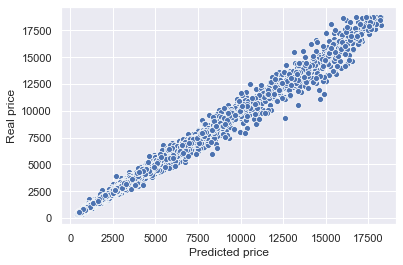

rf_re2
Score is  0.9913599722191839
RMSE is  367.93667540976463


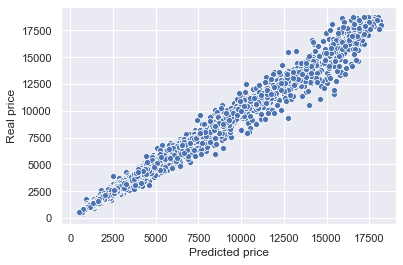

gb1
Score is  0.9910193207759259
RMSE is  375.1198988066682


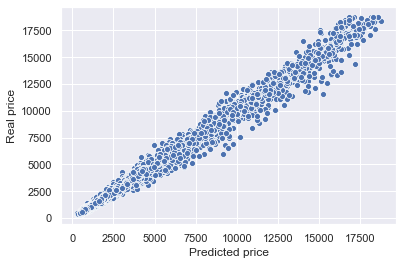

gb2
Score is  0.9903243939222656
RMSE is  389.3629285347289


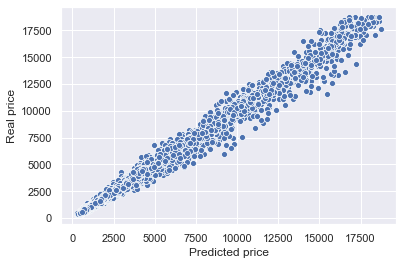

regr1
Score is  0.8785621243104226
RMSE is  1379.4075260160141


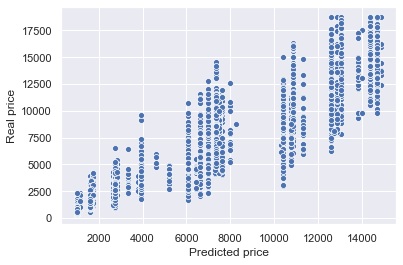

regr2
Score is  -0.14020441496100977
RMSE is  4226.752999743132


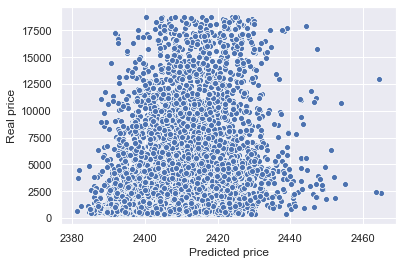

In [15]:
algoModel(algorithms, X, y)